<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/Pressure_BuildUp_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Well Test Analysis with Python** - Part 2

##Pressure Build-up tests. 

Author : Divyanshu Vyas | PE/RE | ML-Deep Learning
Contact : dvyas13ad@gmail.com

Problem statement:
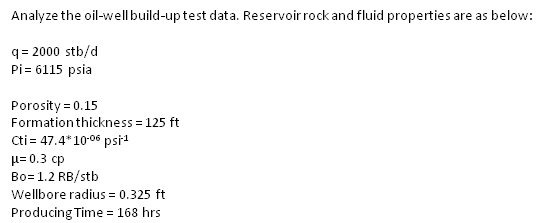

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
df = pd.read_excel('buildup tutorial soln2.xlsx',sheet_name='Sheet2')

In [76]:
df.head()

,t (hrs),Pws
0,0.0000,4192.887177
1,0.0010,4196.716637
2,0.0021,4201.194377
3,0.0034,4207.221945
4,0.0048,4212.246464


In [77]:
df_analysis = df.loc[1:,:]

In [78]:
df_analysis.head()
#note that the t(hrs) column is for the shut in time (dt)

,t (hrs),Pws
1,0.0010,4196.716637
2,0.0021,4201.194377
3,0.0034,4207.221945
4,0.0048,4212.246464
5,0.0064,4219.681700


In [79]:
tp = 168 #hrs

In [80]:
df_analysis['th = (tp+dt)/dt'] = (df_analysis['t (hrs)'] + tp)/df_analysis['t (hrs)']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
# df_analysis.reset_index(inplace=True , drop = True)
# df_analysis.head()

In [82]:
df_analysis['te'] = tp/df_analysis['th = (tp+dt)/dt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df_analysis.head()

,t (hrs),Pws,th = (tp+dt)/dt,te
1,0.0010,4196.716637,168001.000000,0.0010
2,0.0021,4201.194377,80001.000000,0.0021
3,0.0034,4207.221945,49412.764706,0.0034
4,0.0048,4212.246464,35001.000000,0.0048
5,0.0064,4219.681700,26251.000000,0.0064


In [84]:
df['Pws'][0:5]

0    4192.887177
1    4196.716637
2    4201.194377
3    4207.221945
4    4212.246464
Name: Pws, dtype: float64

In [85]:
df_analysis['Pws'][:5]

1    4196.716637
2    4201.194377
3    4207.221945
4    4212.246464
5    4219.681700
Name: Pws, dtype: float64

In [86]:
df_analysis['dp'] = df_analysis['Pws'][0:] - df['Pws'][:-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df_analysis['dp'].head()

1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: dp, dtype: float64

In [88]:
df_analysis['dp/dt_e'] = df_analysis['dp']/(df_analysis['te'][1:] - df_analysis['te'][:-1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_analysis.drop('dp',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
df_analysis['dP'] = df['Pws'][1:] - df['Pws'][0:-1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df_analysis.head()

,t (hrs),Pws,th = (tp+dt)/dt,te,dp/dt_e,dP
1,0.0010,4196.716637,168001.000000,0.0010,NaN,0.0
2,0.0021,4201.194377,80001.000000,0.0021,NaN,0.0
3,0.0034,4207.221945,49412.764706,0.0034,NaN,0.0
4,0.0048,4212.246464,35001.000000,0.0048,NaN,0.0
5,0.0064,4219.681700,26251.000000,0.0064,NaN,0.0


In [93]:
# df_analysis['dp'][0]/(df_analysis['te'][1] - df_analysis['te'][0])

In [ ]:
df_analysis.head()

In [ ]:
df.head()

In [ ]:
# len(df) #86
Pws = np.array(df['Pws'])

In [ ]:
dp = np.array(Pws[1:] - Pws[0:-1])

In [ ]:
te = np.array(df_analysis['te'])
dt_e = np.array(te[1:]-te[0:-1])

In [94]:
dpdt_e = dp[1:]/dt_e
# dpdt_e = dPdt_e + np.zeros(85)
dpdt_e = list(dpdt_e)
dpdt_e.append(0)
dpdt_e = np.array(dpdt_e)

In [95]:
df_analysis['dp/dte']  = dpdt_e

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_analysis.head()

,t (hrs),Pws,th = (tp+dt)/dt,te,dp/dt_e,dP,dp/dte
1,0.0010,4196.716637,168001.000000,0.0010,NaN,0.0,4070.748572
2,0.0021,4201.194377,80001.000000,0.0021,NaN,0.0,4636.742365
3,0.0034,4207.221945,49412.764706,0.0034,NaN,0.0,3589.117253
4,0.0048,4212.246464,35001.000000,0.0048,NaN,0.0,4647.332073
5,0.0064,4219.681700,26251.000000,0.0064,NaN,0.0,4305.343570


In [99]:
df_analysis['te*dp/dt_e'] = df_analysis['dp/dte']*df_analysis['te']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
df_analysis.head()

,t (hrs),Pws,th = (tp+dt)/dt,te,dp/dt_e,dP,dp/dte,te*dp/dt_e
1,0.0010,4196.716637,168001.000000,0.0010,NaN,0.0,4070.748572,4.070724
2,0.0021,4201.194377,80001.000000,0.0021,NaN,0.0,4636.742365,9.737037
3,0.0034,4207.221945,49412.764706,0.0034,NaN,0.0,3589.117253,12.202752
4,0.0048,4212.246464,35001.000000,0.0048,NaN,0.0,4647.332073,22.306557
5,0.0064,4219.681700,26251.000000,0.0064,NaN,0.0,4305.343570,27.553149


In [101]:
df_analysis['DeltaP'] = df_analysis['Pws'] -4192.89

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_analysis.head()

,t (hrs),Pws,th = (tp+dt)/dt,te,dp/dt_e,dP,dp/dte,te*dp/dt_e,DeltaP
1,0.0010,4196.716637,168001.000000,0.0010,NaN,0.0,4070.748572,4.070724,3.826637
2,0.0021,4201.194377,80001.000000,0.0021,NaN,0.0,4636.742365,9.737037,8.304377
3,0.0034,4207.221945,49412.764706,0.0034,NaN,0.0,3589.117253,12.202752,14.331945
4,0.0048,4212.246464,35001.000000,0.0048,NaN,0.0,4647.332073,22.306557,19.356464
5,0.0064,4219.681700,26251.000000,0.0064,NaN,0.0,4305.343570,27.553149,26.791700


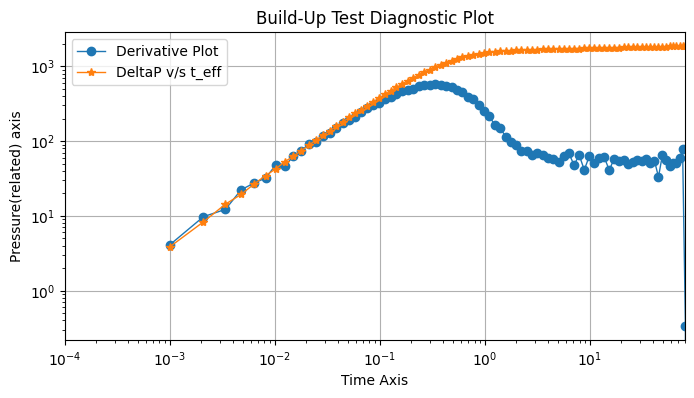

In [116]:
plt.style.use('default')
plt.figure(figsize=(8,4))
plt.loglog(df_analysis['te'], df_analysis['te*dp/dt_e'],linewidth=1, label ='Derivative Plot',marker='o')
plt.xlim(0.0001,80)

plt.xlabel('Time Axis')
plt.ylabel('Pressure(related) axis')

plt.loglog(df_analysis['te'], df_analysis['DeltaP'],linewidth=1, label = 'DeltaP v/s t_eff',marker='*')

plt.title('Build-Up Test Diagnostic Plot')
plt.legend(loc='best')
plt.grid()

#Conclusive Remarks and steps forward:
1. We've found the IARF (horizontal line) and that's the main job of our analysis. 
2. We can spot the USL and that tels us the WelBore Storage Region. 
3. We can take Data from IARF and find the permeability.